### Final Project Submission
* Student name: Kelvin Sila Muia
* Student pace: part time
* Scheduled project review date/time: 10/23/2023
* Instructor name: Asha Deen

important links
* https://github.com/ksila01/Phase-3-Project/blob/main/Classification%20Modeling.ipynb
* https://github.com/ksila01/Phase-3-Project/blob/main/Data%20preparation.ipynb
* https://github.com/ksila01/Phase-3-Project/blob/main/Exploratory%20data%20analysis%20(EDA).ipynb

#### Business Understanding

Since satisfied customers are the foundation of any successful business, our client Syria tell has realized how important it is to gain its satisfaction. Due to growing firm rivalry, the importance of marketing techniques, and customers' conscientious behavior in the modern era, customer churn is considered a critical issue and one of the top issues for businesses. Customer churn practice are crucial in the fiercely competitive and quickly evolving telecom industry. The process of switching telecom service providers happens when a consumer receives favorable services, competitive pricing, or other benefits from the competing company at the time of enrollment. The telecom industry has made the forecast of customer churn an essential component of planning and strategic decision-making, owing to the higher expenses associated with gaining new subscribers. The primary goal of the project is to investigate huge machine-learning data platforms for customer churn prediction in the telecom industry.  The likelihood that a client may churn has been estimated using machine learning techniques. This study uses big data logistic regression, decision trees, KNN, and XGboost models  to predict telecom industry customer churn. A common method for estimating the likelihood of turnover based on a collection of variables or client attributes is logistic regression. In a similar vein, K-Nearest Neighbor is utilized to determine whether or not a customer churns depending on how close their feature is to consumers in each class.

##### Objectives:

* Buid a classifier model to determine whether a customer will soon churn from Syria Tell
* Establish the modeling with the best performance
* Determine features that influence customers churn decisions
* Evaluate any predicable patterns
* Select the best model for classification

#### Data Understanding


SyriaTel is a Syrian based cell phone service company. The dataset is from https://www.kaggle.com/becksddf/churn-in-telecoms-dataset containing 3333 customers covering 51 states including DC over a month period. the columns include;

* state: Name of the states. We will merge our dataset with 2019 population percentage by state dataset to create a percentage of customers by state column to show what this customer represents regarding the whole population. This data is collected from www.census.gov.

* account_length: Number of days a customer has been with the company.

* area_code: Area code is a numerical column. It is represented by 3 different 3-digit-number. We will save this column as object data type.

* phone_number: It has 3333 unique values, no duplicates. It represents phone numbers after the area code. We will drop it.

* international_plan: A 'yes - no' column that we will convert to binary.

* voice_mail_plan: Another 'yes - no' column that we will convert to binary.

* customer_service_calls: The number of the customer service calls made.

* churn: A Boolean column that we will transform into binary.

* total_charge: This columns will be a sum of all charges columns.

* total_calls: Number of total calls including day, evening, night, and international calls.

* total_minutes: Sum of all the minutes used by the customer.

#### Data Preparation
Objectives:
* Confirming missing values or placeholders in the dataset
* Droping irrelavent columns
* Feature engineering to create new columns
* Ascertaining if data transformation is required

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 7)});
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
# Import data
data = pd.read_csv ('CSV/data.csv')
# print data shape
print (data.shape )
# print firt five rows
data.head ()


(3333, 21)


state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [3]:
# The dataset has 21 columns and 3333 observations

In [4]:
# checking column datatypes, placeholders, and null values
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

* The dataset contains data inform of integers, float, object, and booleans

In [5]:
# Making the column_names python friendly
data.columns = data.columns.str.replace(" ", "_")
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

##### Check Missing Values


In [6]:
data.isna().sum ()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

* The dataset has no missing values

##### Check for Duplicates

In [7]:
data.duplicated ().sum ()

0

* The dataset has no duplicates

##### Check for placeholder values

In [8]:
for col in data.columns:
    print(col)
    print(data[col].unique())
    print('\n-----------------------------------------------\n')

state
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

-----------------------------------------------

account_length
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186

  7.96  5.06 13.16  2.13 13.17  5.12  5.65 12.37 10.53]

-----------------------------------------------

total_intl_minutes
[10.  13.7 12.2  6.6 10.1  6.3  7.5  7.1  8.7 11.2 12.7  9.1 12.3 13.1
  5.4 13.8  8.1 13.  10.6  5.7  9.5  7.7 10.3 15.5 14.7 11.1 14.2 12.6
 11.8  8.3 14.5 10.5  9.4 14.6  9.2  3.5  8.5 13.2  7.4  8.8 11.   7.8
  6.8 11.4  9.3  9.7 10.2  8.   5.8 12.1 12.  11.6  8.2  6.2  7.3  6.1
 11.7 15.   9.8 12.4  8.6 10.9 13.9  8.9  7.9  5.3  4.4 12.5 11.3  9.
  9.6 13.3 20.   7.2  6.4 14.1 14.3  6.9 11.5 15.8 12.8 16.2  0.  11.9
  9.9  8.4 10.8 13.4 10.7 17.6  4.7  2.7 13.5 12.9 14.4 10.4  6.7 15.4
  4.5  6.5 15.6  5.9 18.9  7.6  5.   7.  14.  18.  16.  14.8  3.7  2.
  4.8 15.3  6.  13.6 17.2 17.5  5.6 18.2  3.6 16.5  4.6  5.1  4.1 16.3
 14.9 16.4 16.7  1.3 15.2 15.1 15.9  5.5 16.1  4.  16.9  5.2  4.2 15.7
 17.   3.9  3.8  2.2 17.1  4.9 17.9 17.3 18.4 17.8  4.3  2.9  3.1  3.3
  2.6  3.4  1.1 18.3 16.6  2.1  2.4  2.5]

-----------------------------------------------

tota

* Luckly, the dataset has no missing values, duplicates, or placeholders

#### Dropping Columns

In [9]:
data.drop(columns='phone_number', inplace = True)
data.head ()

state  account_length  area_code international_plan voice_mail_plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer_service_calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [10]:
data.describe ()

account_length    area_code  number_vmail_messages  total_day_minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  customer_service_calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

#### Convert Columns dtype from Object/bool to int

In [11]:
data['international_plan'] = data['international_plan'].replace('yes', 1)
data['international_plan'] = data['international_plan'].replace('no', 0)
data['voice_mail_plan'] = data['voice_mail_plan'].replace('yes', 1)
data['voice_mail_plan'] = data['voice_mail_plan'].replace('no', 0)

In [12]:
data.churn.replace((True, False), (1, 0), inplace = True)


In [13]:
data.head ()

state  account_length  area_code  international_plan  voice_mail_plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer_service_calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

### Feature Engineering

In [14]:
#Add total_charge column containing sum of all customer charge
data['total_charge'] = round(data['total_day_charge'] + data['total_eve_charge']
                                  + data['total_night_charge'] + data['total_intl_charge'])
# Add total_calls column containing all calls made by customers except customer service calls
data['total_calls'] = round(data['total_day_calls'] + data['total_eve_calls']
                                  + data['total_night_calls'] + data['total_intl_calls'])
# Add total_minutes column containing all minutes spend by a customer
data['total_minutes'] = round(data['total_day_minutes'] + data['total_eve_minutes'] 
                                  + data['total_night_minutes'] + data['total_intl_minutes'])
data.head ()

state  account_length  area_code  international_plan  voice_mail_plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  ...  total_night_calls  \
0             45.07              197.4  ...                 91   
1             27.47              195.5  ...                103   
2             41.38              121.2  ...                104   
3             50.90               61.9  ...                 89   
4             28.34              148.3  ...                121   

   total_night_charge  total_intl_minutes  total_intl_calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total_intl_charge  customer_service_calls  churn  total_charge  \
0               2.70                       1      0          76.0   
1               3.70                       1      0          59.0   
2               3.29                       0      0          62.0   
3               1.78                       2      0          67.0   
4               2.73                       3      0          52.0   

   total_calls  total_minutes  
0          303          717.0  
1          332          625.0  
2          333          539.0  
3          255          565.0  
4          359          512.0  

[5 rows x 23 columns]

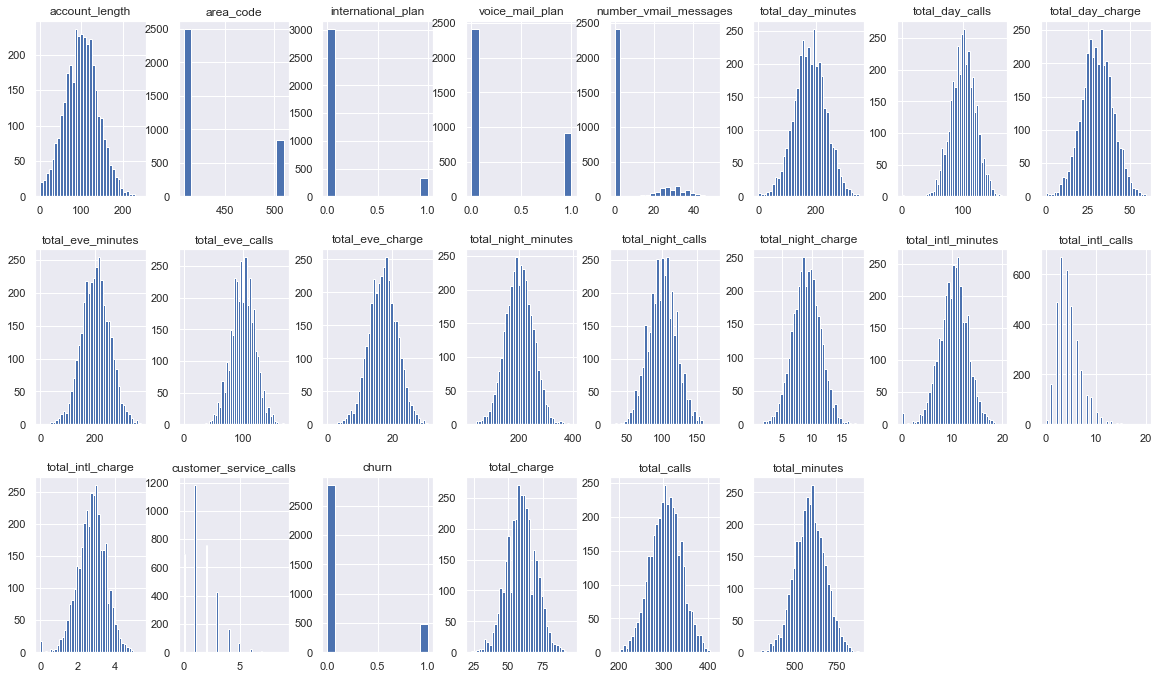

In [15]:
data.hist(bins='auto', layout=(5,8), figsize = (20,20));
# Most of our data is normally distributed

In [16]:
# Saved the Data for Exploratory Data Analysis
data.to_csv('CSV/data_cleaned.csv')

## Exploratory Data Analysis
##### Objectives:
* Determine which States have highest and lowest customer churn rates
* Determine the relationship between customer service calls and customer churns
* Determine the relationship between customer churn behavior and international plan vs voicemail messages

In [17]:
# Import libraries
from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

##### import clearned data

In [18]:
data = pd.read_csv ('CSV/data_cleaned.csv').drop('Unnamed: 0', axis=1)
data.head ()

state  account_length  area_code  international_plan  voice_mail_plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  ...  total_night_calls  \
0             45.07              197.4  ...                 91   
1             27.47              195.5  ...                103   
2             41.38              121.2  ...                104   
3             50.90               61.9  ...                 89   
4             28.34              148.3  ...                121   

   total_night_charge  total_intl_minutes  total_intl_calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total_intl_charge  customer_service_calls  churn  total_charge  \
0               2.70                       1      0          76.0   
1               3.70                       1      0          59.0   
2               3.29                       0      0          62.0   
3               1.78                       2      0          67.0   
4               2.73                       3      0          52.0   

   total_calls  total_minutes  
0          303          717.0  
1          332          625.0  
2          333          539.0  
3          255          565.0  
4          359          512.0  

[5 rows x 23 columns]

In [19]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [20]:
# generate a summary statistics table
round (data.describe ().T,3)

count     mean     std     min     25%     50%  \
account_length          3333.0  101.065  39.822    1.00   74.00  101.00   
area_code               3333.0  437.182  42.371  408.00  408.00  415.00   
international_plan      3333.0    0.097   0.296    0.00    0.00    0.00   
voice_mail_plan         3333.0    0.277   0.447    0.00    0.00    0.00   
number_vmail_messages   3333.0    8.099  13.688    0.00    0.00    0.00   
total_day_minutes       3333.0  179.775  54.467    0.00  143.70  179.40   
total_day_calls         3333.0  100.436  20.069    0.00   87.00  101.00   
total_day_charge        3333.0   30.562   9.259    0.00   24.43   30.50   
total_eve_minutes       3333.0  200.980  50.714    0.00  166.60  201.40   
total_eve_calls         3333.0  100.114  19.923    0.00   87.00  100.00   
total_eve_charge        3333.0   17.084   4.311    0.00   14.16   17.12   
total_night_minutes     3333.0  200.872  50.574   23.20  167.00  201.20   
total_night_calls       3333.0  100.108  19.569   33.00   87.00  100.00   
total_night_charge      3333.0    9.039   2.276    1.04    7.52    9.05   
total_intl_minutes      3333.0   10.237   2.792    0.00    8.50   10.30   
total_intl_calls        3333.0    4.479   2.461    0.00    3.00    4.00   
total_intl_charge       3333.0    2.765   0.754    0.00    2.30    2.78   
customer_service_calls  3333.0    1.563   1.315    0.00    1.00    1.00   
churn                   3333.0    0.145   0.352    0.00    0.00    0.00   
total_charge            3333.0   59.447  10.507   23.00   52.00   59.00   
total_calls             3333.0  305.137  34.448  191.00  282.00  305.00   
total_minutes           3333.0  591.867  89.958  284.00  532.00  594.00   

                           75%     max  
account_length          127.00  243.00  
area_code               510.00  510.00  
international_plan        0.00    1.00  
voice_mail_plan           1.00    1.00  
number_vmail_messages    20.00   51.00  
total_day_minutes       216.40  350.80  
total_day_calls         114.00  165.00  
total_day_charge         36.79   59.64  
total_eve_minutes       235.30  363.70  
total_eve_calls         114.00  170.00  
total_eve_charge         20.00   30.91  
total_night_minutes     235.30  395.00  
total_night_calls       113.00  175.00  
total_night_charge       10.59   17.77  
total_intl_minutes       12.10   20.00  
total_intl_calls          6.00   20.00  
total_intl_charge         3.27    5.40  
customer_service_calls    2.00    9.00  
churn                     0.00    1.00  
total_charge             66.00   96.00  
total_calls             328.00  416.00  
total_minutes           652.00  885.00

In [21]:
# create a copy of a new Dataset
data_sampled = data.copy()
data_sampled.shape

(3333, 23)

* We only have one categorical column (state). All other columns have been transformed to numerical for regression purposes

#### Data analysis and visualization

* Target Variable: Churn

In [22]:
data ['churn'].value_counts ()

0    2850
1     483
Name: churn, dtype: int64

In [23]:
# Calculate % of churn
round (data ['churn'].value_counts (normalize= True)*100,2)

0    85.51
1    14.49
Name: churn, dtype: float64

* 14.49 % (483/3333) of the customers ended their contracts with the company

#### Class Imbalance
To avoid clas imbalance, it is essential to create a subset using random over and under sampling methods to compare the effects of different colums on customer behavior


In [24]:
y = data['churn']
X = data.drop('churn', axis=1)
oversample = RandomOverSampler(sampling_strategy= 0.6, random_state=123)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 2850, 1: 1710})


* There are 2850 unique values for 0 and 1710 values for 1 for oversample

In [25]:
undersample = RandomUnderSampler(sampling_strategy= 'majority', random_state=123)
X_under, y_under = undersample.fit_resample(X_over, y_over)
# summarize class distribution
print(Counter(y_under))

Counter({0: 1710, 1: 1710})


* There are 1710 unique values for 0 and 1710 values for 1 for undersample

In [26]:
# sampled dataset
data_sampled = pd.concat([X_under, y_under], axis=1)
data_sampled.shape

(3420, 23)

In [27]:
round(data_sampled.describe().T, 3)


count     mean      std     min     25%      50%  \
account_length          3420.0  102.087   39.675    1.00   75.00  102.000   
area_code               3420.0  436.703   42.126  408.00  408.00  415.000   
international_plan      3420.0    0.170    0.376    0.00    0.00    0.000   
voice_mail_plan         3420.0    0.231    0.422    0.00    0.00    0.000   
number_vmail_messages   3420.0    6.882   13.021    0.00    0.00    0.000   
total_day_minutes       3420.0  191.196   62.239    0.00  146.80  187.850   
total_day_calls         3420.0  101.632   20.724    0.00   88.00  102.000   
total_day_charge        3420.0   32.504   10.581    0.00   24.96   31.935   
total_eve_minutes       3420.0  205.457   51.691   31.20  169.20  207.050   
total_eve_calls         3420.0  100.677   19.938   12.00   87.00  101.000   
total_eve_charge        3420.0   17.464    4.394    2.65   14.38   17.600   
total_night_minutes     3420.0  202.070   49.477   23.20  167.80  202.900   
total_night_calls       3420.0  100.351   19.692   33.00   87.00  101.000   
total_night_charge      3420.0    9.093    2.227    1.04    7.55    9.135   
total_intl_minutes      3420.0   10.448    2.791    0.00    8.70   10.400   
total_intl_calls        3420.0    4.366    2.535    0.00    3.00    4.000   
total_intl_charge       3420.0    2.822    0.753    0.00    2.35    2.810   
customer_service_calls  3420.0    1.848    1.600    0.00    1.00    1.000   
total_charge            3420.0   61.881   12.357   23.00   53.00   61.000   
total_calls             3420.0  307.027   34.620  191.00  283.00  308.000   
total_minutes           3420.0  609.182  101.338  284.00  536.75  604.000   
churn                   3420.0    0.500    0.500    0.00    0.00    0.500   

                            75%     max  
account_length          127.000  243.00  
area_code               415.000  510.00  
international_plan        0.000    1.00  
voice_mail_plan           0.000    1.00  
number_vmail_messages     0.000   51.00  
total_day_minutes       237.300  350.80  
total_day_calls         116.000  165.00  
total_day_charge         40.340   59.64  
total_eve_minutes       240.700  363.70  
total_eve_calls         114.000  170.00  
total_eve_charge         20.460   30.91  
total_night_minutes     235.725  381.90  
total_night_calls       115.000  175.00  
total_night_charge       10.610   17.19  
total_intl_minutes       12.300   20.00  
total_intl_calls          6.000   20.00  
total_intl_charge         3.320    5.40  
customer_service_calls    3.000    9.00  
total_charge             72.000   96.00  
total_calls             330.000  416.00  
total_minutes           688.000  885.00  
churn                     1.000    1.00

# 1. States with Highest and Lowest Customer Churn Rates

* Feature: State

In [28]:
len (data ['state'].unique ())
# 51 states are included in the dataset

51

* Churn per State

In [29]:
state_churn = data.groupby(['state'])['churn'].mean().sort_values(ascending = False)
state_churn = state_churn.to_frame().reset_index()
state_churn

state     churn
0     CA  0.264706
1     NJ  0.264706
2     TX  0.250000
3     MD  0.242857
4     SC  0.233333
5     MI  0.219178
6     MS  0.215385
7     NV  0.212121
8     WA  0.212121
9     ME  0.209677
10    MT  0.205882
11    AR  0.200000
12    KS  0.185714
13    NY  0.180723
14    MN  0.178571
15    PA  0.177778
16    MA  0.169231
17    CT  0.162162
18    NC  0.161765
19    NH  0.160714
20    GA  0.148148
21    DE  0.147541
22    OK  0.147541
23    OR  0.141026
24    UT  0.138889
25    CO  0.136364
26    KY  0.135593
27    SD  0.133333
28    OH  0.128205
29    FL  0.126984
30    IN  0.126761
31    ID  0.123288
32    WY  0.116883
33    MO  0.111111
34    VT  0.109589
35    AL  0.100000
36    ND  0.096774
37    NM  0.096774
38    WV  0.094340
39    TN  0.094340
40    DC  0.092593
41    RI  0.092308
42    WI  0.089744
43    IL  0.086207
44    NE  0.081967
45    LA  0.078431
46    IA  0.068182
47    VA  0.064935
48    AZ  0.062500
49    AK  0.057692
50    HI  0.056604

In [30]:
fig = px.choropleth(state_churn,
                    locations='state',
                    color='churn',
                    color_continuous_scale='spectral_r',
                    hover_name='state',
                    locationmode='USA-states',
                    labels={'Churn by State'},
                    scope='usa',
                    title='Churn by State')
fig.show()

Conclusion: California and New Jersey reports highest number of customers terminanting their contracts with the company while those with lowest churn are Alaska and Hawaii

### 2. What is the Relationship Between Customer Service Calls and Customer Churn

* Feature: Customer service calls

In [31]:
data_sampled['customer_service_calls'].value_counts()

1    1071
2     695
0     687
3     384
4     340
5     164
6      47
7      17
8       9
9       6
Name: customer_service_calls, dtype: int64

##### churn vs customer service calls

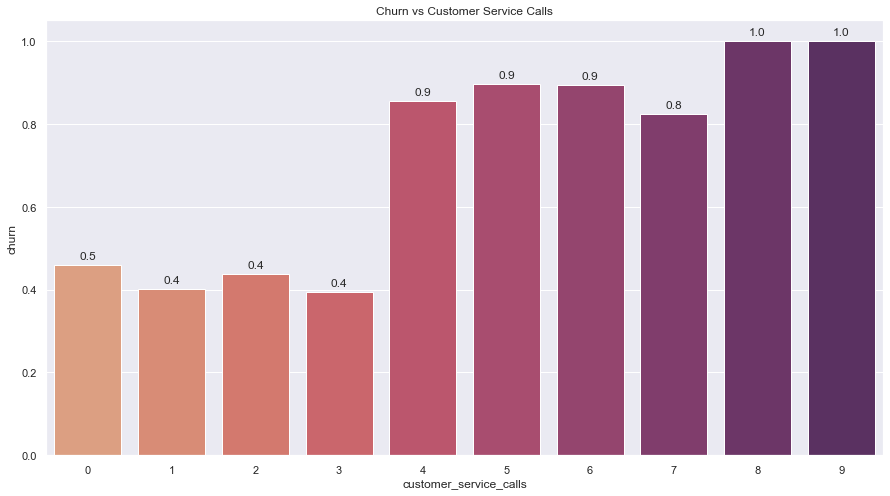

In [32]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='customer_service_calls', y='churn', data=data_sampled, palette='flare', ci=None)
# Add annotations to bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Churn vs Customer Service Calls')
plt.show()

Conclusion:

* From the graph above, customers recieve more than 8 calls from customer servise churn
* Customers who receive more than 4 calls churn at high rate
* Customers who recieve less than 3 calls tend to churn when other factors are put into consieration such as total_charge

### # 3. Determine the relationship between customer churn behavior and international plan vs voicemail messages


###### Feature: International plan

In [33]:
data['international_plan'].value_counts()
print(round(data.groupby('international_plan')['churn'].value_counts(normalize=True),2))

international_plan  churn
0                   0        0.89
                    1        0.11
1                   0        0.58
                    1        0.42
Name: churn, dtype: float64


In [34]:
# Creating a subset with all the international information columns.
data_intl = data_sampled[['international_plan', 'total_intl_minutes', 'total_intl_calls', 
                      'total_intl_charge', 'total_charge', 'churn']]
data_intl.describe().T

count       mean        std   min    25%    50%    75%  \
international_plan  3420.0   0.170468   0.376098   0.0   0.00   0.00   0.00   
total_intl_minutes  3420.0  10.448129   2.790698   0.0   8.70  10.40  12.30   
total_intl_calls    3420.0   4.366082   2.534562   0.0   3.00   4.00   6.00   
total_intl_charge   3420.0   2.821550   0.753479   0.0   2.35   2.81   3.32   
total_charge        3420.0  61.880702  12.357279  23.0  53.00  61.00  72.00   
churn               3420.0   0.500000   0.500073   0.0   0.00   0.50   1.00   

                     max  
international_plan   1.0  
total_intl_minutes  20.0  
total_intl_calls    20.0  
total_intl_charge    5.4  
total_charge        96.0  
churn                1.0

We shall construct a subsample space in which each class will have a 50% international plan class ratio.

In [35]:
data_intl_plan = data_intl[data_intl['international_plan'] == 1]
print(len(data_intl_plan))
data_intl_no_plan = data_intl[data_intl['international_plan'] == 0]
# df_intl_no_plan = df_intl_no_plan.sample(n=959, replace=False, random_state=123)
print(len(data_intl_no_plan))
# 583 with international plan
# 2837 with no international plan

583
2837


In [36]:
round(data_intl.drop('total_charge', axis=1).groupby(['international_plan', 'churn']).describe().T, 3)


international_plan               0                  1         
churn                            0         1        0        1
total_intl_minutes count  1594.000  1243.000  116.000  467.000
                   mean     10.227    10.277    9.834   11.811
                   std       2.813     2.628    2.150    2.889
                   min       0.000     2.000    1.300    4.100
                   25%       8.400     8.700    8.700    9.850
                   50%      10.300    10.200   10.050   11.700
                   75%      12.100    12.000   11.325   13.900
                   max      18.400    18.300   13.000   20.000
total_intl_calls   count  1594.000  1243.000  116.000  467.000
                   mean      4.444     4.350    5.190    3.940
                   std       2.414     2.506    2.299    2.964
                   min       0.000     1.000    3.000    1.000
                   25%       3.000     3.000    4.000    2.000
                   50%       4.000     4.000    4.000    3.000
                   75%       6.000     5.500    6.000    5.500
                   max      18.000    15.000   15.000   20.000
total_intl_charge  count  1594.000  1243.000  116.000  467.000
                   mean      2.762     2.776    2.656    3.189
                   std       0.759     0.710    0.580    0.780
                   min       0.000     0.540    0.350    1.110
                   25%       2.270     2.350    2.350    2.660
                   50%       2.780     2.750    2.715    3.160
                   75%       3.270     3.240    3.057    3.750
                   max       4.970     4.940    3.510    5.400

Conclusion:

* 1243/2837 of customers with no international plan churned while 1584 remained
* 467/ 583 cusomers with international plan ended their contracts while 116 remained

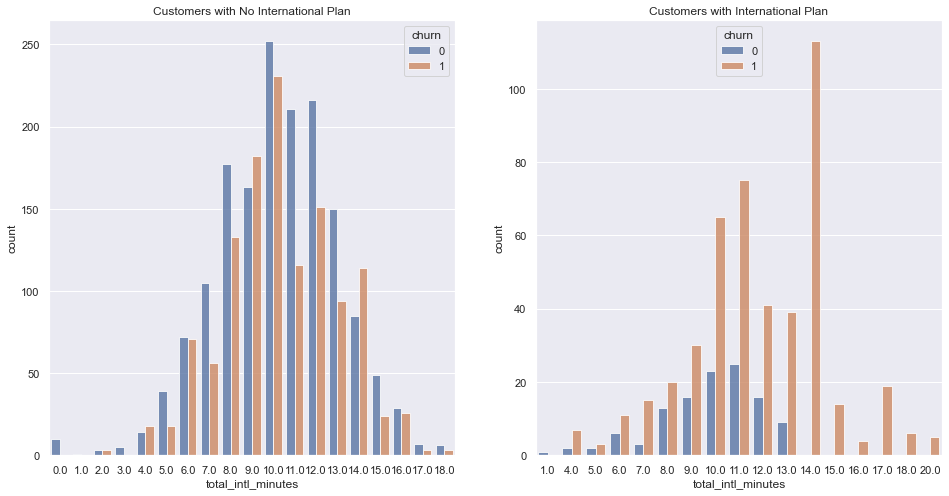

In [37]:
# visualizing churn and international minutes spend
fig, ax =plt.subplots(1,2)
fig.set_size_inches(16,8)
sns.countplot(x=round(data_intl_no_plan['total_intl_minutes']), 
              hue='churn', 
              data=data_intl_no_plan, 
              alpha=0.8, 
              ax=ax[0]).set_title('Customers with No International Plan')
sns.countplot(x=round(data_intl_plan['total_intl_minutes']), 
              hue='churn', 
              data=data_intl_plan, 
              alpha=0.8, 
              ax=ax[1]).set_title('Customers with International Plan')
fig.show();

Conclusion
* Customers with international plan tend to follow a normal distribution with majority of class 0 for total international calls

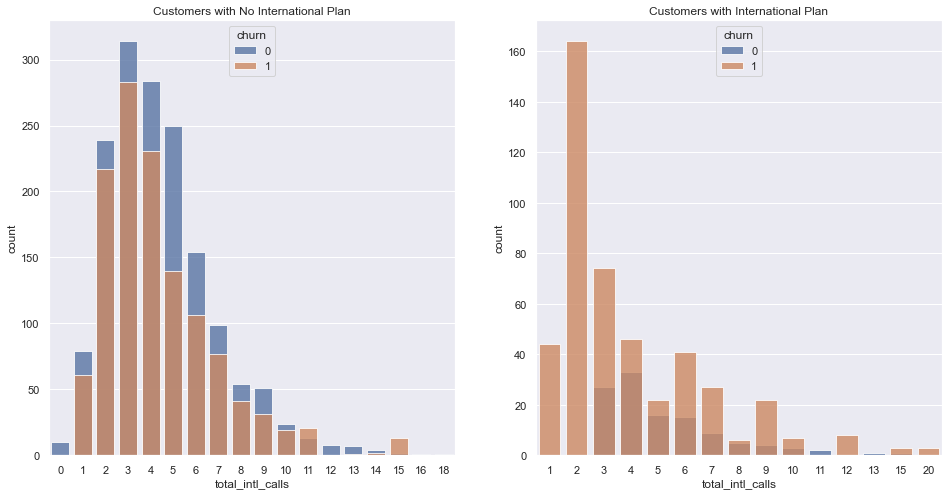

In [38]:
# Visualizing churn vs international calls
fig, ax =plt.subplots(1,2)
fig.set_size_inches(16,8)
sns.countplot(x='total_intl_calls', 
              hue='churn', 
              data=data_intl_no_plan, 
              dodge=False, 
              alpha=0.8, 
              ax=ax[0]).set_title('Customers with No International Plan')
sns.countplot(x='total_intl_calls', 
              hue='churn', 
              data=data_intl_plan, 
              dodge=False, 
              alpha=0.8, 
              ax=ax[1]).set_title('Customers with International Plan')
fig.show();

Conclusion: Customers making international calls did not churn

###### Feature: voice mail plan

In [39]:
data['voice_mail_plan'].value_counts()


0    2411
1     922
Name: voice_mail_plan, dtype: int64

###### churn vs international plan vs voice mail plan

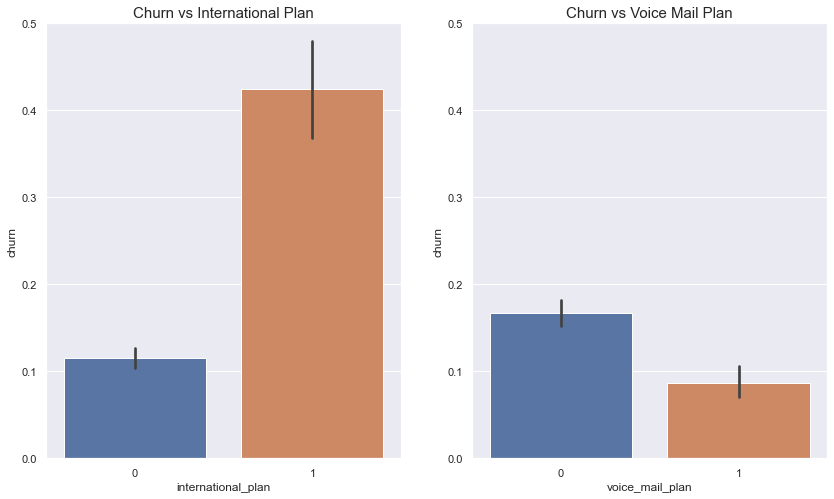

In [40]:
fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(121)
ax1 = sns.barplot(x='international_plan', y='churn', data=data)
ax1.set_title('Churn vs International Plan', fontsize = 15)
ax1.set_ylim((0, 0.50))

ax2 = fig.add_subplot(122)
ax2 = sns.barplot(x='voice_mail_plan', y='churn', data=data)
ax2.set_title('Churn vs Voice Mail Plan', fontsize = 15)
ax2.set_ylim((0, 0.50))
plt.show()

Customers with international plan have a higher risk of churning than those with voice mail plan

## Classification Modeling
Objectives:
* Buid a classifier model to determine whether a customer will soon churn from Syria Tell
* Establish the modeling with the best performance
* Determine features that influence customers churn decisions
* Evaluate any predicable patterns

##### Import libaries

In [41]:
# preprocessing 

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

#Sampling
from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Logistic Regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Naive Bayes
from scipy import stats

# Decision Trees
from math import log #to calculate entropy
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

# Regression with CART Trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# GridSearch
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Gradient Boosting
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# XGBoost
import xgboost as xgb # xgb.XGBClassifier()

# SVM
from sklearn import svm
from sklearn.svm import SVC
import statsmodels as sm


# Pipelines
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings('ignore')

###### Classification model functions
* Developing functions will be important to simplyfy the modeling process

###### Prediction function

In [42]:
# Python funtion named model_predictions that takes five input arguments
def model_predictions(model, X_train, X_test, y_train, y_test):
    """
    Input: Training and test sets of predictors 
    Output: The accuracy_score of the given sets for each class..
    """
    #Use model to make predictions on the training and test data and store predicted values in a variable
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    # Calculate the absolute differenced between the true target values and predicted values for the training data. Store the differnces in the train_residual variable
    train_residuals = np.abs(y_train - y_hat_train)
    # print the training values
    print('Training Values','\n', pd.Series(train_residuals).value_counts())
    # print teh training accuracy
    print('------------------------------------')
    print('Training Accuracy','\n', pd.Series(train_residuals).value_counts(normalize=True))
    print('\n\n')
    # Calculate the absolute difference between the true target values and predicted values
    test_residuals = np.abs(y_test - y_hat_test)
    print('Testing Values: ','\n', pd.Series(test_residuals).value_counts())
    print('------------------------------------')
    print('Testing Accuracy: ','\n', pd.Series(test_residuals).value_counts(normalize=True))

##### ROC curve function

In [43]:
# A function that takes in five arguments
def plot_roc(model, X_train, X_test, y_train, y_test):

    """
    Input: Model, Train and Test data.
    Output: Train and Test AUC, Roc Curve for Train and Test sets.
    This function works for classification models with decision_function attribute.
    """
    # Calculate the decion function scores for the training data
    y_train_score = model.decision_function(X_train)
    # Calculate the decision function scores for the test
    y_test_score = model.decision_function(X_test)
    # Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and the associated thresholds for the ROC curve
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    # Calculate the FPR, TPR for the test data
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    # Calculate the area and the the curve (AUC) for ROC curve of the training data
    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print('------------------------------------')
    
    plt.figure(figsize=(10, 8))
    lw = 2
    
    plt.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    plt.plot(test_fpr, test_tpr, color='darkorange',
             lw=lw, label='Test ROC curve')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [44]:
def plot_roc_pp(model, X_train, X_test, y_train, y_test):

    """
    Input: Model, Train and Test data.
    Output: Train and Test AUC, Roc Curve for Train and Test sets.
    This function works for classification models with predict_proba attribute.
    """
    y_train_score = model.predict_proba(X_train)
    y_test_score = model.predict_proba(X_test)
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score [:,1])
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score [:,1])
    
    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print('------------------------------------')
    
    plt.figure(figsize=(10, 8))
    lw = 2
    
    plt.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    plt.plot(test_fpr, test_tpr, color='darkorange',
             lw=lw, label='Test ROC curve')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

###### Confusion matrix function

In [45]:
def confusion_matrix(model, X_test, y_test):

    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Greens)
    plt.show()

    y_pred = model.predict(X_test)

    print('------------------------------------')
    # print('Accuracy Score:')
    # print(accuracy_score(y_test, y_pred)
    print("Testing Accuracy for Our Classifier: {:.4}%".format(accuracy_score(y_test, y_pred) * 100))

    
    print('------------------------------------')
    print('Classification Matrix:')
    print(classification_report(y_test, y_pred))

###### Model control function

In [46]:
def model_control(model, X_train, X_test, y_train, y_test):

    """
    This function includes all the functions we created above.
    ROC Curve has decision_function attribute.
    """

    model.fit(X_train, y_train)
    print('Train Score:', model.score(X_train, y_train))
    print('Test Score:', model.score(X_test, y_test))
    print('------------------------------------')

    model_predictions(model, X_train, X_test, y_train, y_test)
    confusion_matrix(model, X_test, y_test)
    plot_roc(model, X_train, X_test, y_train, y_test)

In [47]:
def model_control_pp(model, X_train, X_test, y_train, y_test):

    """
    This function includes all the functions we created above.
    Roc Curve has predict_proba attribute.
    """
    
    model.fit(X_train, y_train)
    print('Train Score:', model.score(X_train, y_train))
    print('Test Score:', model.score(X_test, y_test))
    print('------------------------------------')
    
    model_predictions(model, X_train, X_test, y_train, y_test)
    confusion_matrix(model, X_test, y_test)
    plot_roc_pp(model, X_train, X_test, y_train, y_test)

##### Feature importance plot function

In [48]:
def plot_feature_importances(model, X, X_train):
    n_features = X_train.shape[1]
    sns.set_style('darkgrid')
    plt.figure(figsize=(8, 11))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.values, fontsize=13) 
    plt.xlabel('Importance', fontsize=16)
    plt.ylabel('Feature', fontsize=16)
    plt.title('Feature Importance', fontsize=20)

### The Model 

In [49]:
### Defining X and y values
y = data['churn']
X = data.drop(['churn', 'state', 'area_code'], axis=1)

#### Base model: Logistic regression

##### Model

In [50]:
# Train-test split, test size 75% and randomn_state of 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)


In [51]:
# Standarding the training data using the StandardScaler
# Use RFE to select the top 10 columns to fit out model
# Set random_state to 123 for our Logistic Regression model and determine parameters. 
scaler = StandardScaler()
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)
model = LogisticRegression(fit_intercept=False, 
                           C=10e16,  
                           solver='liblinear',
                           class_weight='balanced', 
                           max_iter=10000, 
                           random_state=123)                        


pipeline_lr = Pipeline(steps=[('s', rfe), 
                              ('ss', scaler), 
                              ('m', model)])

# Fit the model

pipeline_lr.fit(X_train, y_train)

print('Train Score:', pipeline_lr.score(X_train, y_train))
print('Test Score:', pipeline_lr.score(X_test, y_test))


Train Score: 0.6502601040416166
Test Score: 0.6642685851318945


* The training score (0.6503) indicates that the model correctly classifies around 65.03% of the samples in the training dataset.
* The test score (0.6643) indicates that the model correctly classifies around 66.43% of the samples in the test dataset.
* These scores suggest that the model's performance is better on the test data compared to the training data, which is often a good sign.

###### Predictions

In [52]:
# Using model_predictions function for checking the accuracy of predicting each class for both our train and test datasets.
model_predictions(pipeline_lr, X_train, X_test, y_train, y_test)


Training Values 
 0    1625
1     874
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.65026
1    0.34974
Name: churn, dtype: float64



Testing Values:  
 0    554
1    280
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.664269
1    0.335731
Name: churn, dtype: float64


* These results indicate that for the training dataset, the model correctly classifies about 65.03% of class 0 samples and about 34.97% of class 1 samples. The overall training accuracy is 65.03%, which matches the training accuracy mentioned in your previous code.
* In the testing dataset, the model correctly classifies about 66.43% of class 0 samples and about 33.57% of class 1 samples. The overall testing accuracy is 66.43%, which also matches the testing accuracy mentioned in your previous code
* The training and testing accuracy scores for class 0 are roughly similar, indicating that the model performs consistently for this class in both datasets.
* However, the training and testing accuracy scores for class 1 show a significant difference. The model performs better on class 1 in the training dataset (34.97%) compared to the testing dataset (33.57%).
* It is essential to consider other evaluation metrics (such as precision, recall, and F1-score) and potentially address class imbalance issues if present in your dataset to obtain a more comprehensive understanding of the model's performance. The accuracy results suggest that the model is performing better than random guessing, but there may be room for improvement, especially for class 1.

###### Confusion matrix

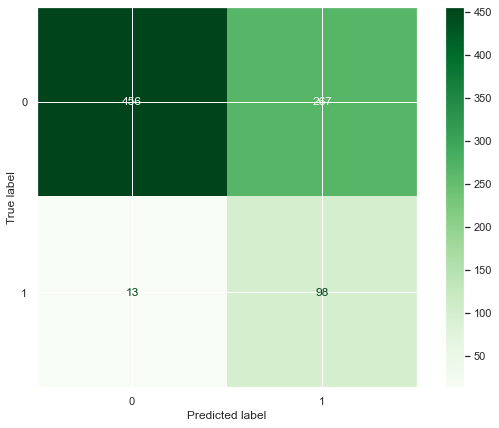

------------------------------------
Testing Accuracy for Our Classifier: 66.43%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.97      0.63      0.77       723
           1       0.27      0.88      0.41       111

    accuracy                           0.66       834
   macro avg       0.62      0.76      0.59       834
weighted avg       0.88      0.66      0.72       834



In [53]:
confusion_matrix(pipeline_lr, X_test, y_test)


* The testing accuracy for the classifier is 66.43%. This means that the model correctly predicted the class labels for approximately 66.43% of the samples in the testing dataset.

* Precision: Precision is a measure of how many of the positive predictions made by the model are correct. In this case:

* For class 0 (label 0), the precision is 0.97. This indicates that when the model predicts class 0, it is correct 97% of the time.

* For class 1 (label 1), the precision is 0.27. This means that when the model predicts class 1, it is correct only 27% of the time.

* For class 0 (label 0), the recall is 0.63. This indicates that the model correctly identifies 63% of the actual class 0 cases.

* For class 1 (label 1), the recall is 0.88. This means that the model correctly identifies 88% of the actual class 1 cases.

* F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this case:

* For class 0 (label 0), the F1-score is 0.77.

* For class 1 (label 1), the F1-score is 0.41.

###### ROC curve

Train AUC: 0.8074740535157297
Test AUC: 0.8377630742775971
------------------------------------


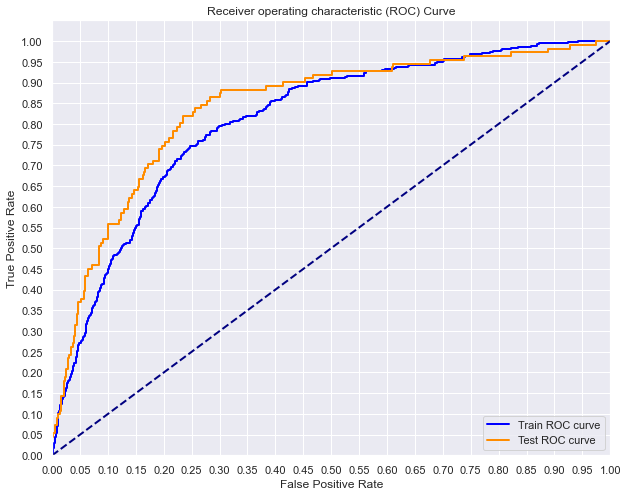

In [54]:
plot_roc(pipeline_lr, X_train, X_test, y_train, y_test)


* The AUC value for the training dataset is approximately 0.8075. AUC measures the overall performance of a classification model.
* An AUC of 0.5 indicates that the model performs no better than random chance, while an AUC of 1.0 indicates a perfect model.
* In this case, an AUC of 0.8075 suggests that the model has a good ability to distinguish between the positive and negative classes in the training data 
* A higher AUC on the testing dataset (0.8378) compared to the training dataset (0.8075) suggests that the model is generalizing well and is likely not overfitting. 
* Generally, a higher AUC is desirable as it means the model is better at classifying instances. 
* In summary, the ROC curves and AUC values indicate that the logistic regression model performs well in distinguishing between the classes on both the training and testing datasets.
* The higher AUC on the testing dataset suggests that the model's performance generalizes well to unseen data, which is a positive sign for the model's predictive ability.

##### Tuning the model

###### Class imbalance
* The base model need to be improved in terms of predicting 1s. To address this issue, it is essential to address class imbalance. I can use sampling methods or SMOTE

In [55]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
# Initiate sampling class
oversample = RandomOverSampler(sampling_strategy='minority', random_state=123)
# Fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
# Summarize class distribution
print(Counter(y_train_over))
print('------------------------------------')
# Fit our model
pipeline_lr.fit(X_train_over, y_train_over)
print('Train Score:', pipeline_lr.score(X_train_over, y_train_over))
print('Test Score:', pipeline_lr.score(X_test, y_test))

Counter({0: 2127, 1: 2127})
------------------------------------
Train Score: 0.7679830747531735
Test Score: 0.7817745803357314


* The training score is approximately 0.768, which means the model correctly classifies about 76.8% of the samples in the oversampled training dataset. This score is higher compared to the previous training score without oversampling. 

* The testing score is approximately 0.782, indicating that the model correctly classifies about 78.2% of the samples in the testing dataset. This score is higher compared to the previous testing score without oversampling.

* By using oversampling to balance the class distribution in the training data, the model's performance on both the training and testing datasets has improved. 
* The testing score of 0.782 suggests that the model is performing well on unseen data, which is a positive outcome. 


Train Score: 0.7679830747531735
Test Score: 0.7817745803357314
------------------------------------
Training Values 
 0    3267
1     987
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.767983
1    0.232017
Name: churn, dtype: float64



Testing Values:  
 0    652
1    182
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.781775
1    0.218225
Name: churn, dtype: float64


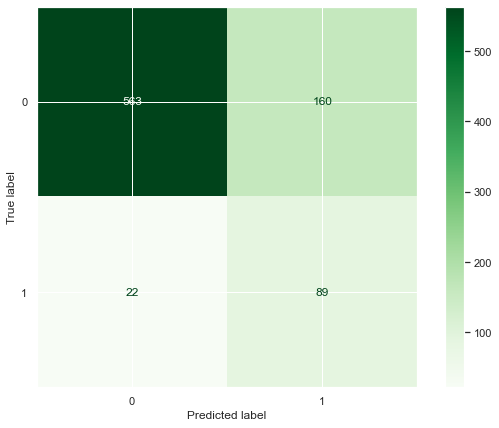

------------------------------------
Testing Accuracy for Our Classifier: 78.18%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       723
           1       0.36      0.80      0.49       111

    accuracy                           0.78       834
   macro avg       0.66      0.79      0.68       834
weighted avg       0.88      0.78      0.81       834

Train AUC: 0.8202668403133508
Test AUC: 0.8485290269522634
------------------------------------


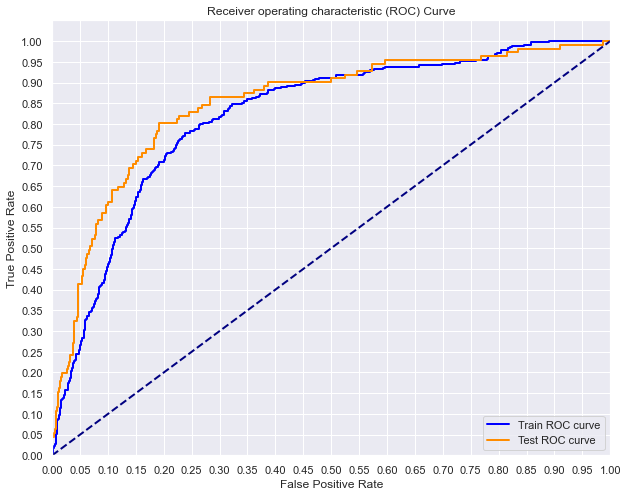

In [56]:
model_control(pipeline_lr, X_train_over, X_test, y_train_over, y_test)


* The results suggest that the model performs reasonably well, with improved accuracy, when trained on the oversampled data. 


##### SMOTE
* SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address class imbalance by oversampling the minority class

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(sampling_strategy=0.7)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    2850
1     483
Name: churn, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

0    2127
1    1488
Name: churn, dtype: int64


In [58]:
lr_smote = LogisticRegression(fit_intercept=False, 
                           C=10e16,  
                           solver='liblinear', 
                           max_iter=10000, 
                           random_state=123) 

lr_smote.fit(X_train_resampled, y_train_resampled)

print('Train Score:', pipeline_lr.score(X_train_resampled, y_train_resampled))
print('Test Score:', pipeline_lr.score(X_test, y_test))

Train Score: 0.6318118948824343
Test Score: 0.8657074340527577


* The training score of 0.6326 suggests that the model is not as accurate on the resampled training data compared to some of the other models previously evaluated. It may indicate that the model is underfitting the data or that the chosen hyperparameters are not optimal for this specific dataset.

* The testing score of 0.8657 indicates that the model performs well on the testing dataset, with an accuracy of about 86.57%. It's important to ensure that the testing dataset is not used in the training process to obtain an unbiased evaluation of the model's performance.

## K NEAREST NEIGHTBORS (KNN)
##### The model

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_clf = KNeighborsClassifier(n_neighbors=5)

# Fit the model

knn_clf.fit(X_train_scaled, y_train)

print('Train Score:', knn_clf.score(X_train_scaled, y_train))
print('Test Score:', knn_clf.score(X_test_scaled, y_test))

Train Score: 0.9179671868747499
Test Score: 0.9004796163069544


* The training score is approximately 0.918, indicating that the KNN classifier correctly classifies about 91.8% of the samples in the training dataset. 
* This score represents the accuracy of the model on the training data. 
* The testing score is approximately 0.9005, suggesting that the KNN classifier correctly classifies about 90.05% of the samples in the testing dataset. 
* This score represents the accuracy of the model on unseen or test data.

###### Predictions

In [60]:
model_predictions(knn_clf, X_train_scaled, X_test_scaled, y_train, y_test)


Training Values 
 0    2294
1     205
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.917967
1    0.082033
Name: churn, dtype: float64



Testing Values:  
 0    751
1     83
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.90048
1    0.09952
Name: churn, dtype: float64


* The KNN classifier demonstrates a significant class imbalance, as evident in both the training and testing datasets. Class 0 is dominant, with a much larger number of samples compared to class 1.
* The KNN classifier has a high training accuracy for class 0, suggesting it performs well in correctly classifying class 0 instances. However, it performs poorly on class 1 in the training data.
* In the testing dataset, a similar pattern is observed. The model has high accuracy for class 0 but very low accuracy for class 1.
* This class imbalance can lead to an accuracy paradox, where high overall accuracy may not be representative of the model's performance on the minority class (class 1). 


##### Confusion matrix

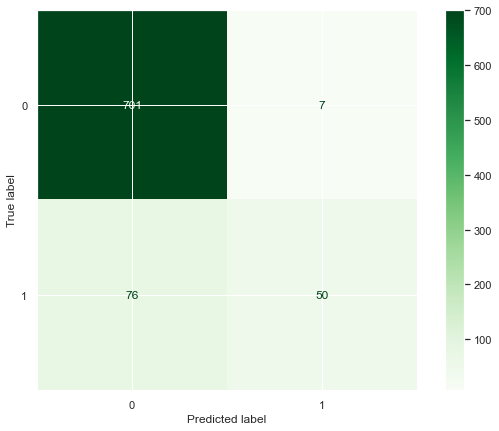

------------------------------------
Testing Accuracy for Our Classifier: 90.05%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       708
           1       0.88      0.40      0.55       126

    accuracy                           0.90       834
   macro avg       0.89      0.69      0.75       834
weighted avg       0.90      0.90      0.88       834



In [61]:
confusion_matrix(knn_clf, X_test_scaled, y_test)


* The testing accuracy for the classifier is 90.05%. This means that the classifier correctly classifies about 90.05% of the samples in the testing dataset. 
###### For Class 0 (Label 0):
* Precision for class 0 is 0.90. This means that when the model predicts class 0, it is correct 90% of the time. Recall: 
* Recall for class 0 is 0.99. This indicates that the model correctly identifies 99% of the actual class 0 cases. 
* The F1-score for class 0 is 0.94. The F1-score is the harmonic mean of precision and recall and provides a balanced measure of accuracy. 
###### For Class 1 (Label 1):

* Precision for class 1 is 0.88. This means that when the model predicts class 1, it is correct 88% of the time.
* Recall for class 1 is 0.40. This indicates that the model correctly identifies 40% of the actual class 1 cases. 
* The F1-score for class 1 is 0.55. This F1-score reflects the balance between precision and recall for class 1.

###### ROC curve

Train AUC: 0.9623437610338254
Test AUC: 0.8680835799479868
------------------------------------


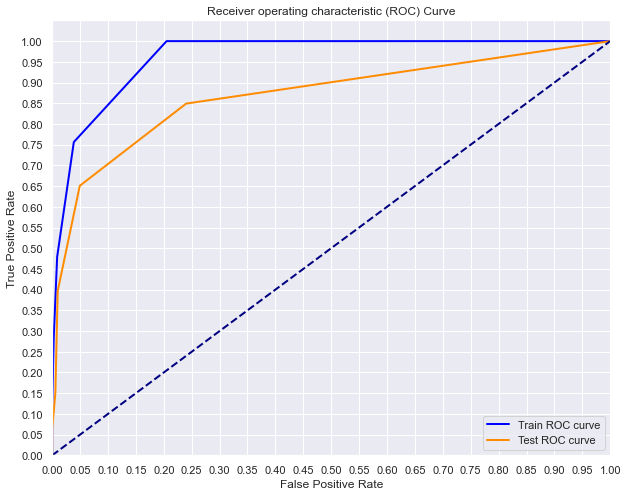

In [62]:
plot_roc_pp(knn_clf, X_train_scaled, X_test_scaled, y_train, y_test)


* The training AUC of 0.9623 is very high, indicating that the model has learned to separate the classes effectively in the training dataset, and it fits the training data well.
* The testing AUC of 0.8681 is also relatively high, suggesting that the model generalizes well to the testing data. 
* While it may not perform as well as it did on the training data, an AUC of 0.8681 is a positive sign, indicating that the model is still capable of distinguishing between the classes in the testing dataset.

###### Model tuning

###### VIF score
* Multicollinearity is a concern in K-Nearest Neighbors (KNN) and many other machine learning algorithms, as it can impact the model's performance and make feature importance interpretation difficult. 
* To check for multicollinearity using a heatmap, I need to compute the correlation matrix for your dataset and then visualize it using a heatmap

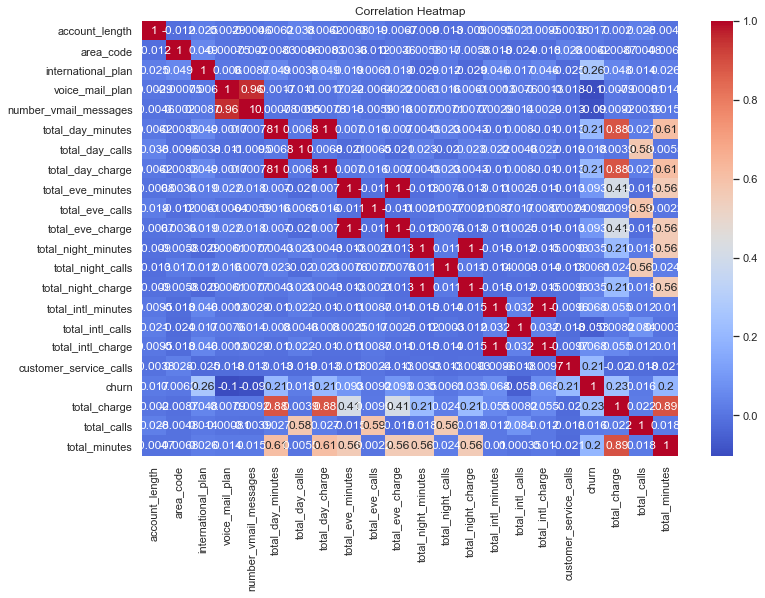

In [63]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

* As we can see from the heatmap above, there are highly correlated columns as expected. 
* Eliminating highly correlated columns using VIF (Variance Inflation Factor) is a common approach to address multicollinearity in the dataset. 
* VIF measures how much the variance of an estimated regression coefficient is increased due to collinearity in the predictors. 
* The higher the VIF, the stronger the multicollinearity.


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)
vif = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif_scores = list(zip(X_train.columns, vif))
vif_scores.sort(key=lambda x: x[1], reverse=True,)
print('VIF SCORES')   
print((vif_scores))
print('------------------------------')
columns_to_use = list()
for vif_score in vif_scores:
    if vif_score[1] < 10:
        columns_to_use.append(vif_score[0])
print('Columns to Use For Logistic Regression','\n', columns_to_use)

VIF SCORES
[('total_day_calls', inf), ('total_eve_calls', inf), ('total_night_calls', inf), ('total_intl_calls', inf), ('total_calls', inf), ('total_day_minutes', 125650862.22583802), ('total_day_charge', 125088490.19478323), ('total_eve_minutes', 38071272.99777575), ('total_eve_charge', 37681699.64937254), ('total_night_minutes', 11228811.167547043), ('total_night_charge', 10662716.339477567), ('total_minutes', 4320288.6854152875), ('total_intl_charge', 992050.561874533), ('total_intl_minutes', 992020.339665135), ('total_charge', 43738.52989158381), ('voice_mail_plan', 16.184906535968867), ('number_vmail_messages', 15.793920198480455), ('account_length', 7.283348833186514), ('customer_service_calls', 2.3840710876616713), ('international_plan', 1.1203480460560564)]
------------------------------
Columns to Use For Logistic Regression 
 ['account_length', 'customer_service_calls', 'international_plan']


* Multicollinearity, especially when VIF scores are very high or infinite, can be problematic in KNN 
* It makes it challenging to identify the contribution of individual features to the model.
* To address multicollinearity, I  selected columns that have lower VIF scores and are less correlated with other features. 
* These columns are expected to work better in a logistic regression model, as they are less likely to introduce collinearity issues.

In [65]:
X_train = X_train[columns_to_use]
X_test = X_test[columns_to_use]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_clf_vif = KNeighborsClassifier(n_neighbors=5)

# Fit the model

knn_clf_vif.fit(X_train_scaled, y_train)

print('Train Score:', knn_clf_vif.score(X_train_scaled, y_train))
print('Test Score:', knn_clf_vif.score(X_test_scaled, y_test))

Train Score: 0.8895558223289316
Test Score: 0.8525179856115108


* After addressing multicollinearity and selecting a subset of features with lower VIF scores, I trained a KNN classifier with these features. 
* The model achieved a good level of accuracy on both the training and testing datasets. 
* The accuracy on the testing dataset (85.25%) suggests that the model generalizes well to unseen data. 


Train Score: 0.8895558223289316
Test Score: 0.8525179856115108
------------------------------------
Training Values 
 0    2223
1     276
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.889556
1    0.110444
Name: churn, dtype: float64



Testing Values:  
 0    711
1    123
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.852518
1    0.147482
Name: churn, dtype: float64


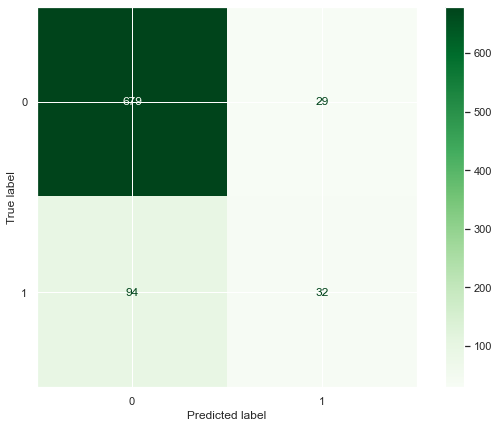

------------------------------------
Testing Accuracy for Our Classifier: 85.25%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       708
           1       0.52      0.25      0.34       126

    accuracy                           0.85       834
   macro avg       0.70      0.61      0.63       834
weighted avg       0.82      0.85      0.83       834

Train AUC: 0.8809053032977896
Test AUC: 0.7075990942516366
------------------------------------


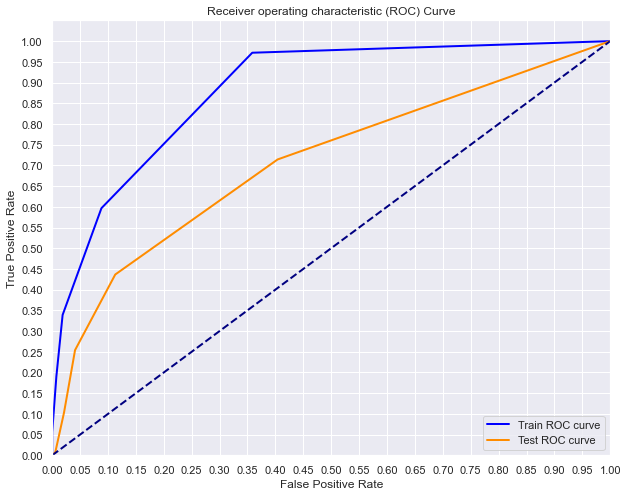

In [66]:
model_control_pp(knn_clf_vif, X_train_scaled, X_test_scaled, y_train, y_test)


##### Best K Value
* Choosing the best "k" is a critical hyperparameter tuning step, as it can significantly impact the model's performance.
* The best "k" value may vary from one dataset to another, so it's a good practice to search for it when applying KNN to a new problem.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_score = knn.score(X_train, y_train)
        test_score = knn.score(X_test, y_test)
        if test_score > best_score:
            best_k = k
            best_score = test_score
    
    print("Best Value for k: {}".format(best_k))
    
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)

Best Value for k: 3


* The function found that the best value for "k" is 3. 
* This means that when "k" is set to 3 in the KNN classifier, it results in the highest testing accuracy on the provided dataset. 
* This value of "k" is considered optimal for making predictions with the KNN model on this dataset.
* Now that we have identified the best "k" as 3, we can proceed with using this value in your KNN classifier.

In [69]:
knn_3_clf = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn_3_clf.fit(X_train_scaled, y_train)

print('Train Score:', knn_3_clf.score(X_train_scaled, y_train))
print('Test Score:', knn_3_clf.score(X_test_scaled, y_test))

Train Score: 0.9343737494997999
Test Score: 0.9040767386091128


* The KNN classifier, configured with the best "k" value of 3, has achieved high accuracy on both the training and testing datasets.
* The training accuracy of 93.44% suggests that the model fits the training data very well, correctly classifying the majority of samples.
* The testing accuracy of 90.41% indicates that the model generalizes effectively to unseen data, maintaining a high level of accuracy.
* These results suggest that the KNN model with the selected "k" value is performing well and is a good choice for making predictions on this dataset.

Train Score: 0.9343737494997999
Test Score: 0.9040767386091128
------------------------------------
Training Values 
 0    2335
1     164
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.934374
1    0.065626
Name: churn, dtype: float64



Testing Values:  
 0    754
1     80
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.904077
1    0.095923
Name: churn, dtype: float64


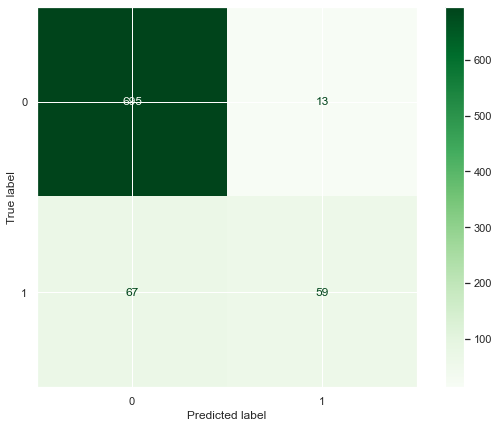

------------------------------------
Testing Accuracy for Our Classifier: 90.41%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       708
           1       0.82      0.47      0.60       126

    accuracy                           0.90       834
   macro avg       0.87      0.72      0.77       834
weighted avg       0.90      0.90      0.89       834

Train AUC: 0.97388628654076
Test AUC: 0.8538752129853825
------------------------------------


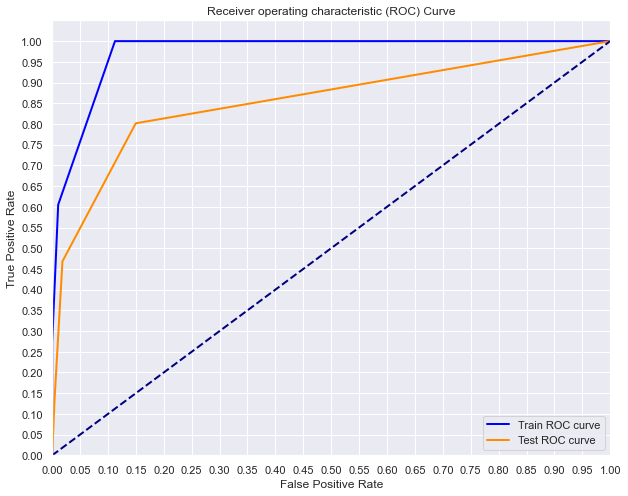

In [70]:
model_control_pp(knn_3_clf, X_train_scaled, X_test_scaled, y_train, y_test)


##### Gridsearch
* Grid Search will automatically test all combinations of hyperparameters and return the best combination. 
* This is a powerful technique for hyperparameter tuning and helps find the optimal settings for your KNN classifier.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_clf_gs = KNeighborsClassifier()

knn_grid = {'n_neighbors': [3, 5, 7, 9],
            'weights':['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan'],
            'n_jobs': [-1]}

knn_gridsearch = GridSearchCV(estimator=knn_clf_gs, 
                              param_grid=knn_grid, 
                              cv=5,
                              return_train_score=True)



# Fit to the data
knn_gridsearch.fit(X_train_scaled, y_train)

# Best parameters for our Decision Tree model:
print('Best parameters for Our KNN Model:')
knn_gridsearch.best_params_

Best parameters for Our KNN Model:


{'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'uniform'}

In [72]:
knn_clf_gs = KNeighborsClassifier(metric='manhattan', 
                                  n_jobs=-1, 
                                  n_neighbors=7, 
                                  weights='uniform')

knn_clf_gs.fit(X_train_scaled, y_train)

print('Train Score:', knn_clf_gs.score(X_train_scaled, y_train))
print('Test Score:', knn_clf_gs.score(X_test_scaled, y_test))

Train Score: 0.9131652661064426
Test Score: 0.8968824940047961


* The KNN classifier has been trained with specific hyperparameters determined by grid search. It uses the Manhattan distance metric, considers 7 neighbors, and assigns equal weight to all neighbors in the classification decision.

* The training accuracy, indicated by "Train Score," is approximately 0.9132. This score suggests that the model correctly classifies about 91.32% of the samples in the training dataset.

* The testing accuracy, indicated by "Test Score," is approximately 0.8969. This score suggests that the model correctly classifies about 89.69% of the samples in the testing dataset.

* The difference between the training and testing accuracies is not excessively large, indicating that the model is not overfitting the training data.

Train Score: 0.9131652661064426
Test Score: 0.8968824940047961
------------------------------------
Training Values 
 0    2282
1     217
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.913165
1    0.086835
Name: churn, dtype: float64



Testing Values:  
 0    748
1     86
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.896882
1    0.103118
Name: churn, dtype: float64


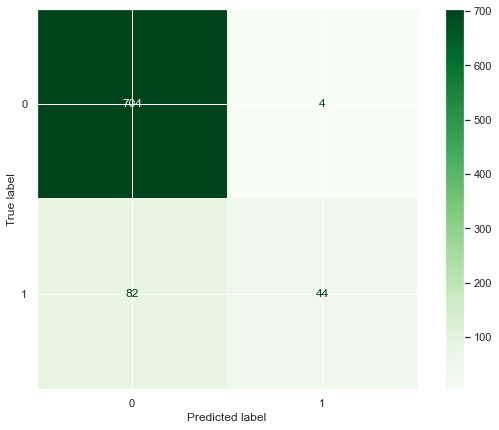

------------------------------------
Testing Accuracy for Our Classifier: 89.69%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       708
           1       0.92      0.35      0.51       126

    accuracy                           0.90       834
   macro avg       0.91      0.67      0.72       834
weighted avg       0.90      0.90      0.88       834

Train AUC: 0.9536272025149928
Test AUC: 0.8722928436911488
------------------------------------


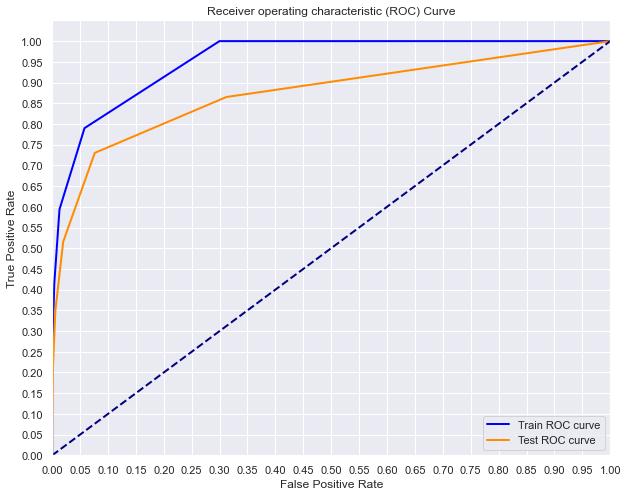

In [73]:
model_control_pp(knn_clf_gs, X_train_scaled, X_test_scaled, y_train, y_test)


#### Decision trees

###### The model

In [74]:
# StandardScaler to scale our training data.
# random_state to 123 for the Decision Tree model. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
scaler = StandardScaler()
model = DecisionTreeClassifier(random_state=123)                       

pipeline_dt = Pipeline([('ss', scaler), 
                        ('m', model), 
                       ])

# Fit the model

pipeline_dt.fit(X_train, y_train)

print('Train Score:', pipeline_dt.score(X_train, y_train))
print('Test Score:', pipeline_dt.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.9364508393285371


* The vanilla model has a high test score of 94%. 

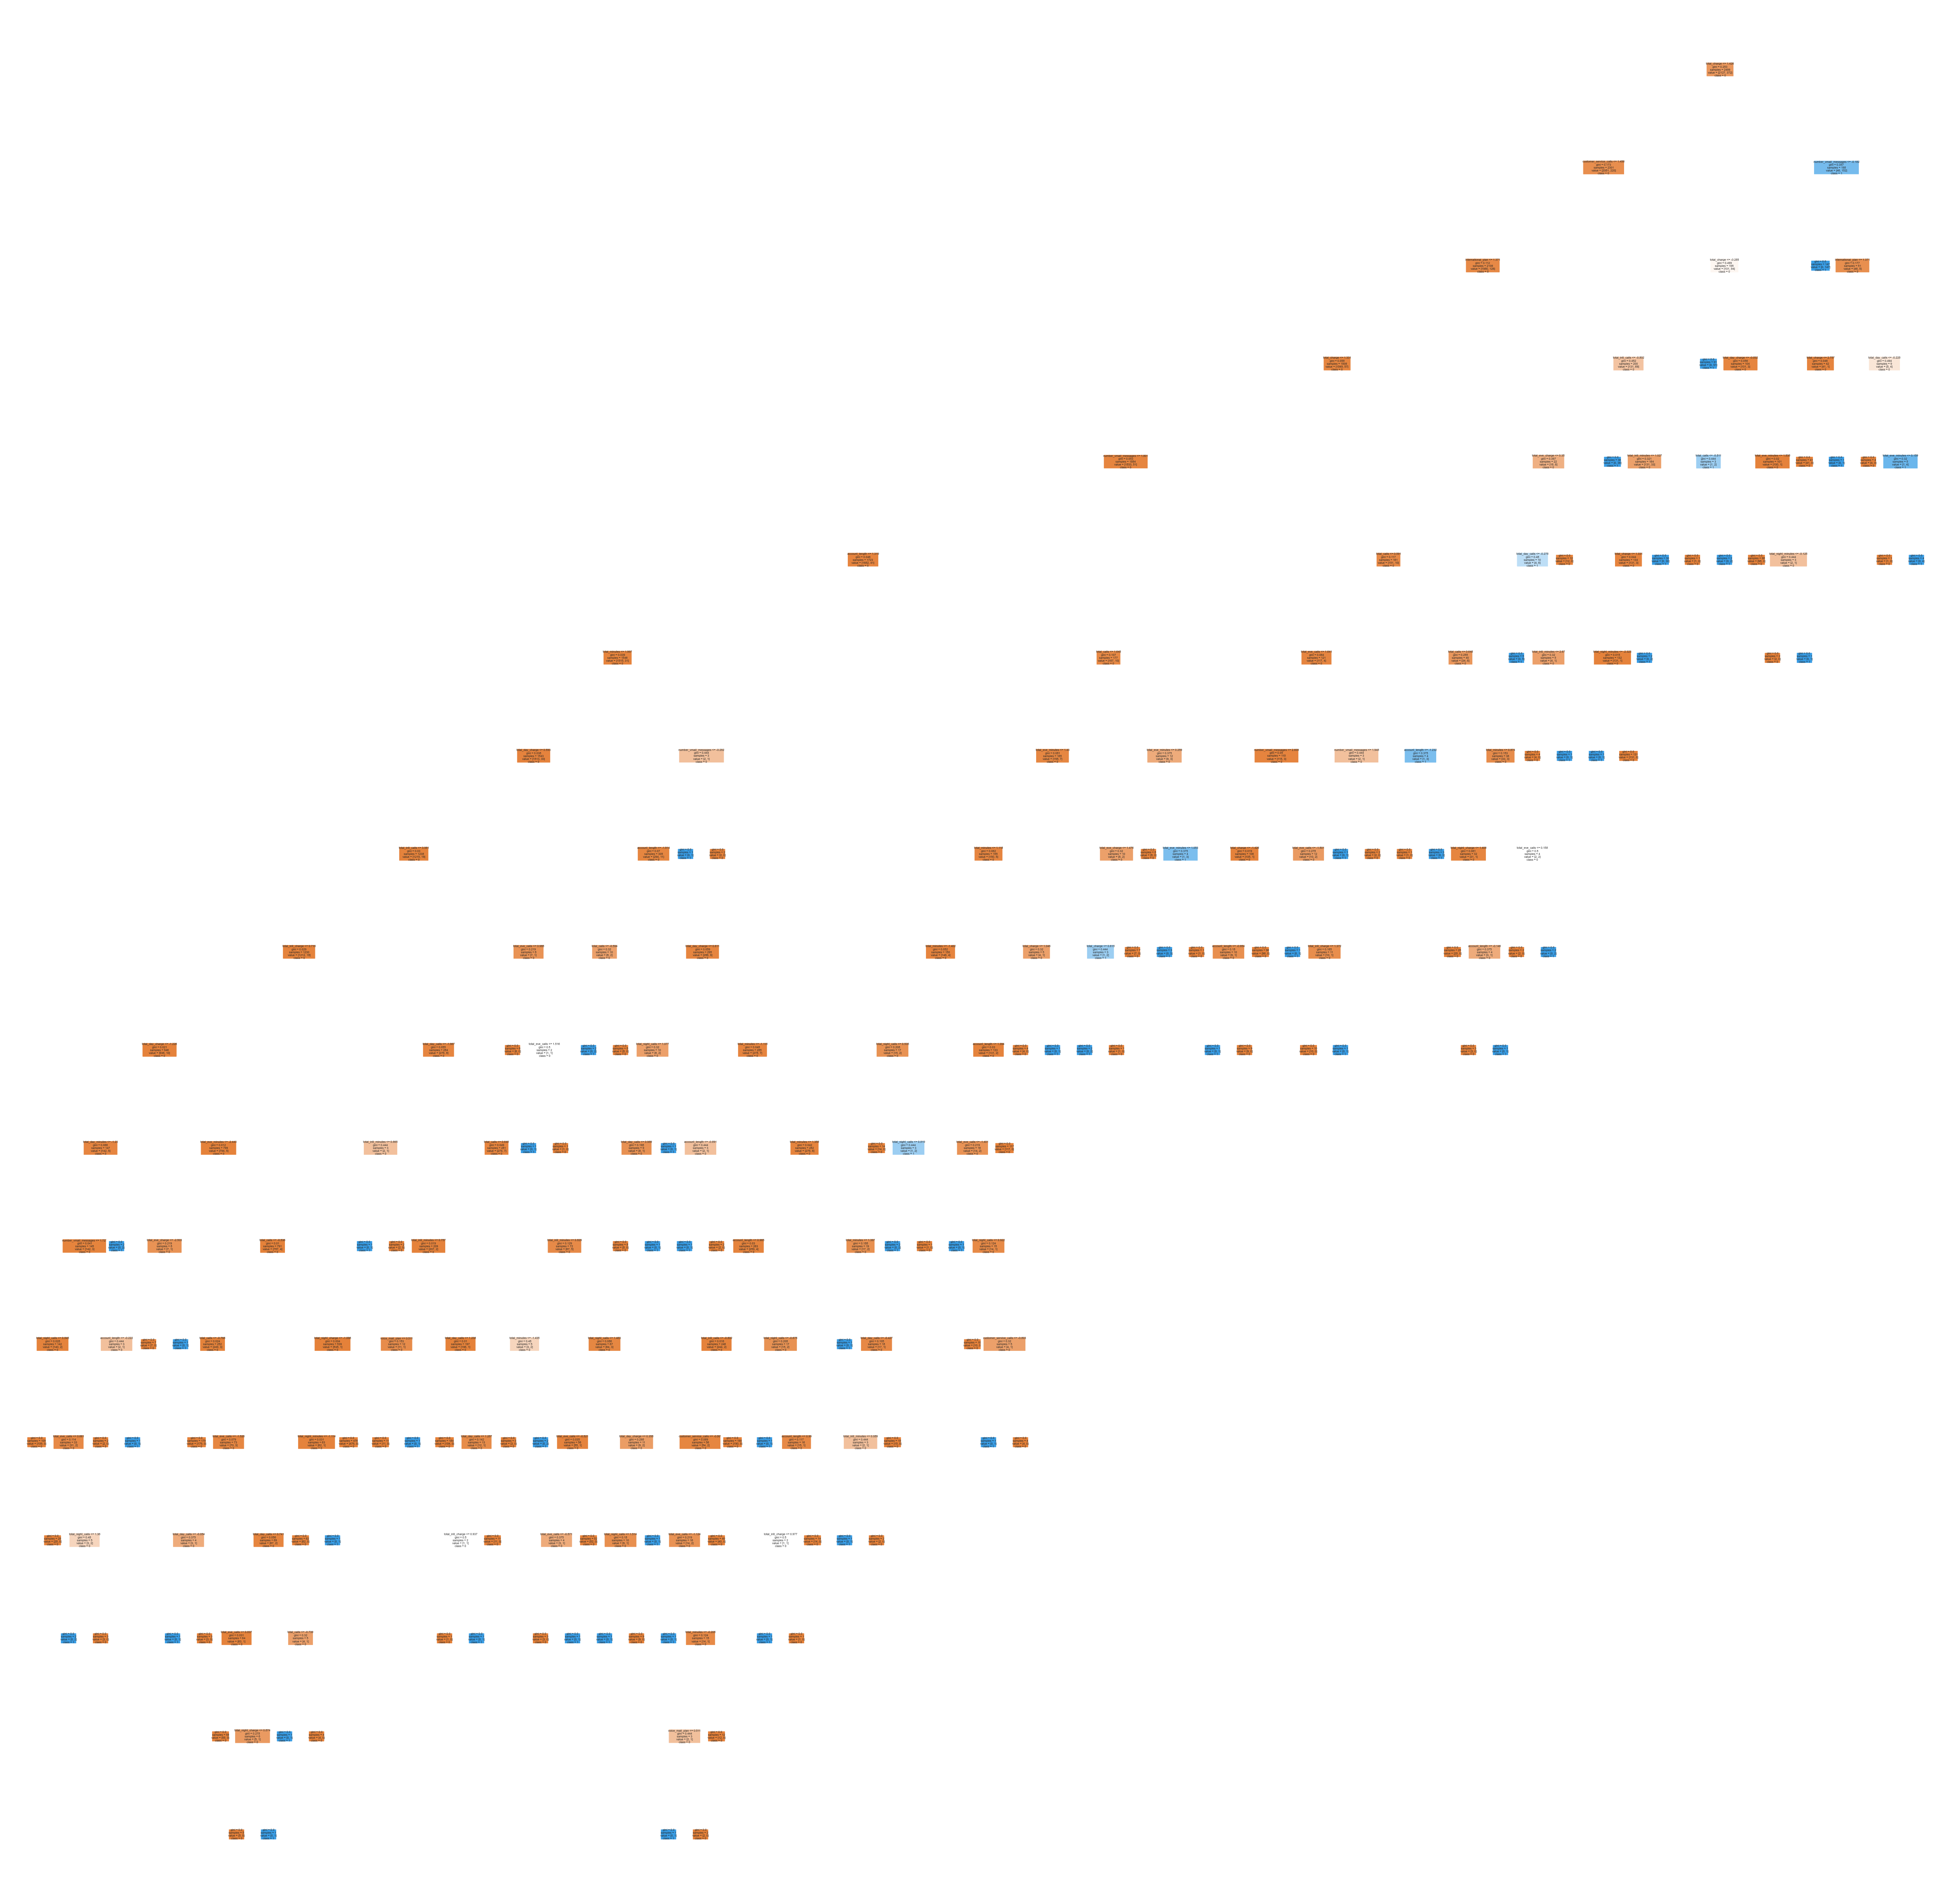

In [75]:
# Visualizing the decision tree
plt.figure(figsize=(12,12), dpi=500, edgecolor='black')

tree.plot_tree(model, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

###### Predictions

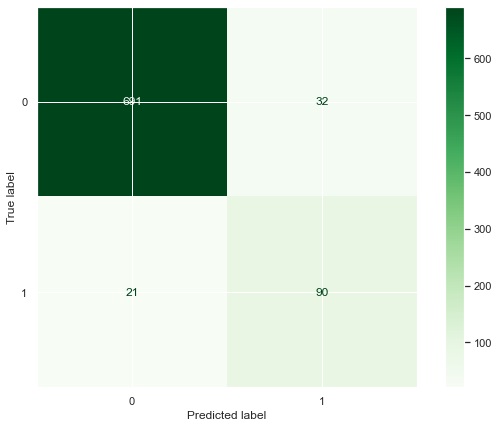

------------------------------------
Testing Accuracy for Our Classifier: 93.65%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       723
           1       0.74      0.81      0.77       111

    accuracy                           0.94       834
   macro avg       0.85      0.88      0.87       834
weighted avg       0.94      0.94      0.94       834



In [76]:
confusion_matrix(pipeline_dt, X_test, y_test)


* The testing accuracy of 93.65% suggests that the model performs well on the testing dataset, with a high level of correct classifications. 
* The classification report provides a more detailed understanding of the model's performance, indicating good precision and recall for both classes, although class 1 has lower precision and recall compared to class 0. 
* The F1-scores provide a balance between precision and recall, with a high F1-score for class 0 and a somewhat lower F1-score for class 1. * Overall, the model appears to have a good balance between precision and recall, especially for class 0, and is effective in classifying the majority class (class 0) while maintaining reasonable performance for the minority class (class 1).

###### ROC curve

Train AUC: 1.0
Test AUC: 0.8832753915741469
------------------------------------


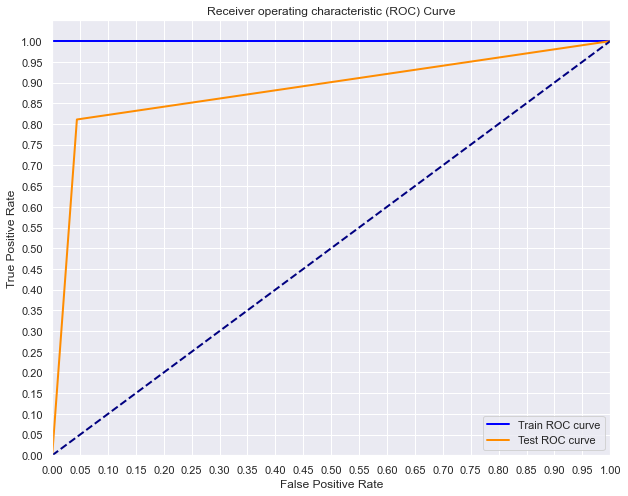

In [77]:
plot_roc_pp(pipeline_dt, X_train, X_test, y_train, y_test)


* The AUC value of 0.8833 on the testing dataset indicates that the model has reasonably good discriminative power for classifying instances on the testing data, but it's not as perfect as the training AUC. 
* This is expected, as models should perform slightly worse on unseen data compared to training data.
* An AUC of 0.8833 suggests that the model is effective in distinguishing between the classes but may still make some classification errors on the testing data.

##### Model tuning

###### Class imbalance

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initiate sampling class
oversample = RandomOverSampler(sampling_strategy='minority', random_state=123)
# Fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train_scaled, y_train)
# Summarize class distribution
print(Counter(y_train_over))

dt_clf_os = DecisionTreeClassifier(random_state=123)                       

dt_clf_os.fit(X_train_over, y_train_over)

Counter({0: 2127, 1: 2127})


DecisionTreeClassifier(random_state=123)

Train Score: 1.0
Test Score: 0.9520383693045563
------------------------------------
Training Values 
 0    4254
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    1.0
Name: churn, dtype: float64



Testing Values:  
 0    794
1     40
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.952038
1    0.047962
Name: churn, dtype: float64


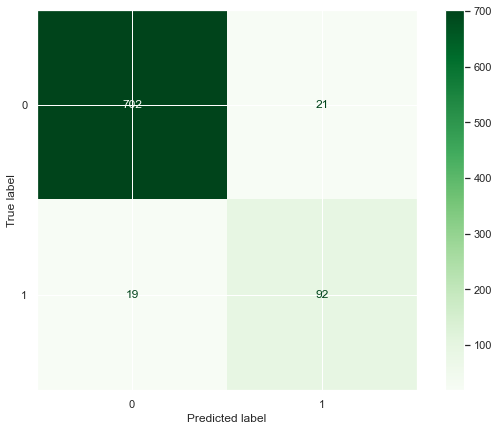

------------------------------------
Testing Accuracy for Our Classifier: 95.2%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       723
           1       0.81      0.83      0.82       111

    accuracy                           0.95       834
   macro avg       0.89      0.90      0.90       834
weighted avg       0.95      0.95      0.95       834

Train AUC: 1.0
Test AUC: 0.899891592837651
------------------------------------


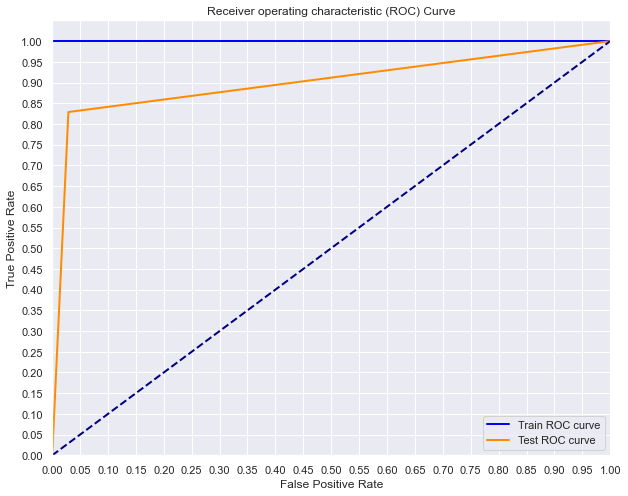

In [79]:
model_control_pp(dt_clf_os, X_train_over, X_test_scaled, y_train_over, y_test)


## XGBOOST


In [80]:
# Preform train/test split.
# Scale data.
# Initiate random XGBoost classifier.
# Fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_clf = xgb.XGBClassifier(max_depth=5, 
                            learning_rate=0.1, 
                            random_state=123)

# Fit the model

xgb_clf.fit(X_train_scaled, y_train)

print('Train Score:', xgb_clf.score(X_train_scaled, y_train))
print('Test Score:', xgb_clf.score(X_test_scaled, y_test))

Train Score: 0.9819927971188476
Test Score: 0.9760191846522782


* The XGBoost classifier has been trained and evaluated on both the training and testing data. It exhibits high accuracy on both the training and testing datasets, indicating that it performs well and generalizes effectively to unseen data. 

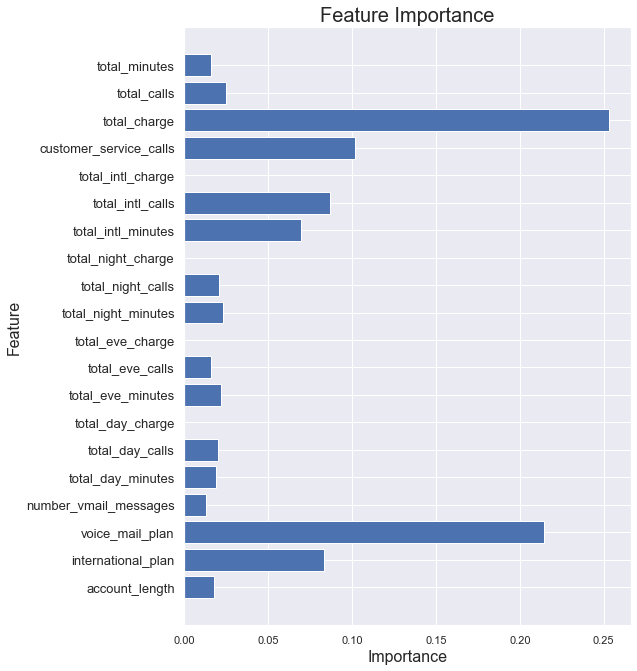

In [81]:
plot_feature_importances(xgb_clf, X, X_train_scaled)


###### Predictions

In [82]:
model_predictions(xgb_clf, X_train_scaled, X_test_scaled, y_train, y_test)


Training Values 
 0    2454
1      45
Name: churn, dtype: int64
------------------------------------
Training Accuracy 
 0    0.981993
1    0.018007
Name: churn, dtype: float64



Testing Values:  
 0    814
1     20
Name: churn, dtype: int64
------------------------------------
Testing Accuracy:  
 0    0.976019
1    0.023981
Name: churn, dtype: float64


###### Confusion matrix

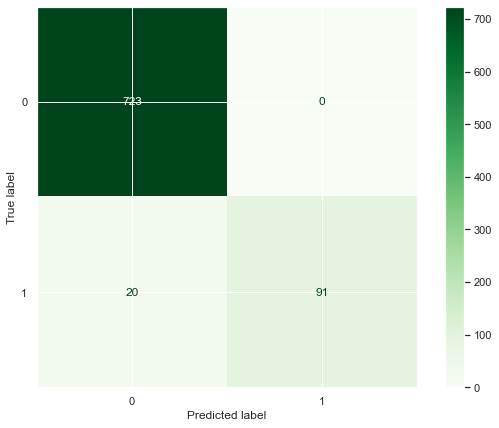

------------------------------------
Testing Accuracy for Our Classifier: 97.6%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       723
           1       1.00      0.82      0.90       111

    accuracy                           0.98       834
   macro avg       0.99      0.91      0.94       834
weighted avg       0.98      0.98      0.97       834



In [83]:
confusion_matrix(xgb_clf, X_test_scaled, y_test)


* The testing accuracy of 97.6% suggests that the XGBoost classifier performs exceptionally well on the testing dataset, with a high level of correct classifications.
* Overall, the model exhibits excellent classification performance on both classes, with high precision and F1-scores, making it a strong candidate for this classification task.

###### ROC curve

Train AUC: 0.9999418636981765
Test AUC: 0.9248003189911903
------------------------------------


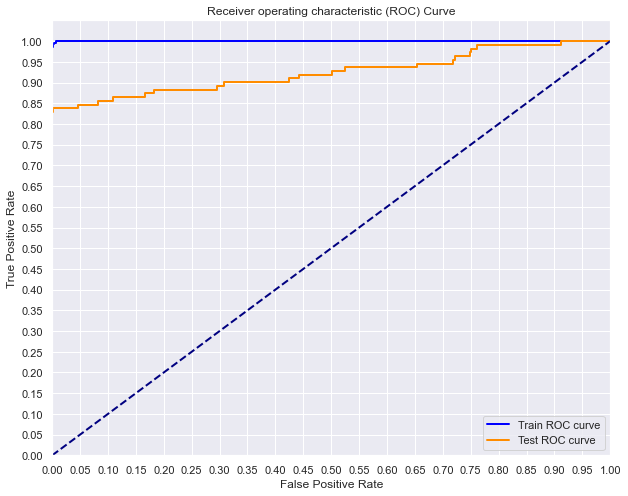

In [84]:
plot_roc_pp(xgb_clf, X_train_scaled, X_test_scaled, y_train, y_test)


* An AUC of approximately 0.9999 on the training dataset suggests very high discrimination between the two classes. In other words, the model can distinguish between the positive and negative classes with almost perfect accuracy on the training data. This indicates that the model has learned the training data very well and can separate the classes effectively.
* The AUC of approximately 0.9248 on the testing dataset is a measure of the model's ability to discriminate between the two classes on unseen data.
* An AUC value of 0.9248 indicates that the model performs well in distinguishing between the classes on the testing data, but it is not as perfect as the training AUC. 
* This is expected, as models typically perform slightly worse on unseen data compared to training data.
* In summary, while the training AUC is almost perfect (0.9999), indicating potential overfitting, the testing AUC of 0.9248 suggests that the model generalizes well and performs well in distinguishing between the classes on unseen data. It's important to balance model performance on training and testing data, as overly complex models with high training AUC may not perform well in practice due to overfitting.

##### Model tuning
###### Gridsearch

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_clf_gs = xgb.XGBClassifier(random_state=123)

xgb_grid = {
            'learning_rate': [0.01, 0.1, 0.5], 
            'gamma': [0, 0.01, 0.1], 
            'max_depth': [2, 5, 6, 10], 
            'min_child_weight': [0.1, 1, 10], 
            'subsample': [0.5, 0.7, 0.9], 
            'n_estimators': [5, 10, 20, 100]
           }

xgb_gridsearch = GridSearchCV(estimator=xgb_clf_gs, 
                              param_grid=xgb_grid, 
                              cv=5, 
                              return_train_score=True)

xgb_gridsearch.fit(X_train_scaled, y_train)

print('Best Parameters for Our XGBoost Model:')
xgb_gridsearch.best_params_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_clf_gs = xgb.XGBClassifier(gamma=0, 
                               learning_rate=0.1, 
                               max_depth=6, 
                               min_child_weight=0.1, 
                               n_estimators=100, 
                               subsample=0.5, 
                               random_state=123)

# Fit the model

xgb_clf_gs.fit(X_train_scaled, y_train)

print('Train Score:', xgb_clf_gs.score(X_train_scaled, y_train))
print('Test Score:', xgb_clf_gs.score(X_test_scaled, y_test))

In [ ]:
model_control_pp(xgb_clf_gs, X_train_scaled, X_test_scaled, y_train, y_test)


* XGBOOST  performs very well, with high accuracy, precision, recall, and F1-scores on both classes.
* The AUC values, while not perfect, indicate that the model can effectively distinguish between the classes on both training and testing data.
* The model seems to generalize well to unseen data, with only a slight difference between training and testing performance.
* Overall, the XGBOOST classifier demonstrates strong performance on the classification task

##### Conclusions
The Logistic Model has the lowest training and testing scores among the four models. While it performs reasonably well on the testing data, it has a noticeable performance gap compared to the other models. The KNN Model exhibits a strong performance with a high training score. It generalizes well to the testing data, achieving a respectable testing score. The Decision Tree Model has a perfect training score, which might indicate overfitting on the training data. However, it still performs very well on the testing data, with a testing score of 0.9520. The XGBoost Model demonstrates the best performance among the four models. It has high training and testing scores, indicating that it learns the data well and generalizes effectively to new, unseen data.In summary, the Decision Tree and XGBoost models perform exceptionally well, with the XGBoost model having a slight edge. The KNN model also performs well but not as perfectly as the Decision Tree and XGBoost models. The Logistic Model has the lowest performance among the four models. 

##### Final Best Model: XGBOOST

* F1 Score = 89%. Higher F1 scores are usually indicative of better quality. F1 scores have a range of 0 to 1, where 1 denotes a model that accurately assigns each observation to the appropriate class and 0 denotes a model that cannot assign any observations to the appropriate class. As a result, our model is able to predict whether or not a consumer would leave. It will assist SyriaTel in acting quickly to keep its soon-to-be-churning client base.

* Accuracy Score = , 96% of the time, our algorithm can accurately identify the type of consumers (churn or not churn).

* Precision Score = 99%. i.e. If our model labels a given cell of customer as churn, there is about a 999% chance that he/she will actually churn and about a 1% chance that it is actually not churn.

* Recall score = 81%. i.e. There is roughly an 80% probability that our model will properly identify a given customer cell as soon-to-churn, and a 20% chance that it will wrongly identify the same customer cell as not-to-churn. This is the case if our model identifies a given customer cell as churn.


##### Recommendations
* Since the majority of the fundamental variables are associated with high costs, SyriaTel should analyze its competitors' markets in order to compare and refine its own pricing strategy. Understanding the competition and the industry-standard allows us to obtain more precise key attributes that predict client churn.

* Knowing every stage involved in a customer's interaction with the business is essential. It is imperative that management comprehends and implements customer experience journey design, customer experience measurement, and customer-centric culture establishment. For instance, we can examine the content of customer support conversations in order to gauge the quality of the customer experience using surveys, voice of the customer, and net promoter ratings. When selecting a carrier, it is vital to comprehend the needs and top concerns of the customers.



